# Facilities

- welcher Download? Ich habe die ganze Liste runtergeladen, da sind nur die Operating Facillites drin. In deinen zwei Downloads scheint auch Closed mit drin zu sein?
- welche states sind relevant? Es gibt kein Close Date, also unklar, in welcher Time-range man nicht Operating Facillites halten sollte
- => wie aggregieren? Einmal aktuellen stand zähen oder anhand des Opening Dates zählen per district? Wohin gehen die ohne Opnening Date? 
- map to district by lat/lng or try to extrapolate by region/district/council names?
- No data for zanzibar Archipelago (5 regions)!
- lat/lng coordindates are not always correct, some are invalid, some are outside tanzania (main stuff seems to be correct though, ~13 % (1343) have no coordinates
- some mismatches between given region name and provided coordinate (most look minor, but some are realy outside the district)
- Was fällt jeweils in welche categorie?
 - Dispensery Density
 - Health Center Density 
 - Clinic Density
 - Hospital Density
 - Health Lab Density
 
 
 Link der scheinabr alles runterläd: 
 
https://hfrportal.moh.go.tz/index.php?r=facilities/exportToExcel&url=http%3A%2F%2F41.59.227.72%2Findex.php%2Fapi%2Fhealth-facility%2Fadvance-search%3Fpage%3Dall%26Admin_div%3DTZ&report_title=+

http://41.59.227.72/api/health-facility/index auf der Seite liegen die daten da gibt es auch ein paar Kontakt infos:

http://41.59.227.72/site/login?active_tab=Welcome-Details-tab

ups...

yii framework

http://41.59.227.72/index.php/api/health-facility/advance-search


-> JSON Download mit mehr fehledern.

http://41.59.227.72/index.php/api/health-facility/advance-search?page=all&Admin_div=TZ&report_title=+

`Admin_div` kann verwendet werden um die Anzeige einzugrenzen, bswp. `TZ.LK.MZ.NA`


im excel export link steht die URL der API dhinter: 

https://hfrportal.moh.go.tz/index.php?r=facilities%2FadvancedSearch&SiteForm%5Bzone%5D=TZ.WT&SiteForm%5Bregion%5D=TZ.WT.SI&SiteForm%5Bdistrict%5D=TZ.WT.SI.MT&SiteForm%5Bcouncil%5D=&SiteForm%5Bnode_id%5D=TZ.WT.SI.MT&SiteForm%5Bfacility_type_categories%5D=DSP&SiteForm%5Bfacility_type%5D=&SiteForm%5Boperating_status%5D=Opert&SiteForm%5Bownership_categories%5D=&SiteForm%5Bownership_type%5D=&SiteForm%5Bequipment_list%5D=&SiteForm%5Bservice_offered%5D=&SiteForm%5Binfrastructure_category%5D=&SiteForm%5Bdate_from%5D=&SiteForm%5Bdate_to%5D=2022-04-28&yt0=Search

https://hfrportal.moh.go.tz/index.php?r=facilities/exportToExcel&url=http://41.59.227.72/index.php/api/health-facility/advance-search?page=all&Admin_div=TZ.WT.SI.MT&Fac_Type=DSP&OperatingStatus=Opert&report_title=+

-> 

In [1]:
import pandas as pd

# prevent false warning
# https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
pd.options.mode.chained_assignment = None  # default='warn'

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

import datetime as dt

import geopandas
from shapely.geometry import Point

import logging
import re


dateparse = lambda x: dt.datetime.strptime(x, '%Y-%m-%d')

In [2]:
from dbconf import get_engine

In [3]:
logging.basicConfig(filename='healtfacilites.log', encoding='utf-8', level=logging.INFO)


In [157]:
df = pd.read_html('../input/data.local/-2022-Apr-24__13_44_38.xls', 
                 header=1, na_values=['Not Set', 'NIL', 'NOT documented', 'not documented'])[0]

# date_parser throws error on read_html
# parse_dates=['Date Opened'], date_parser=dateparse

In [158]:
df['Operating Status'].value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')

,unique_values,counts
0,Operating,10209
1,Permanent closed,784
2,Pending Operation - Under Construction,774
3,Pending Operation - Construction Complete,299
4,Finishing,128
5,Temporary closed,93
6,NaN,80
7,Roofing,67
8,Wall,66
9,Foundation,34


In [163]:
df[df['Operating Status'] == 'Pending Operation - Under Construction']

,ID,Facility Number,Facility Name,Latitude,Longitude,Common Name,Region,District,Council,Ward,...,Operating Status,Ownership,Date Opened,Official Phone Number,MTUHA,CTC_ID,msd_id,PostalAddress,OfficialEmail,Website
163,1692,108587-7,ALENSONI,-6.95372,38.96669,Kifuru,Pwani Region,Kisarawe District,Kisarawe DC,Kisarawe,...,Pending Operation - Under Construction,Faith Based Organization (FBO) Private,1970-01-01,754015465,NaN,NaN,NaN,12107 DSM,mkatayoba@gmail.com,NaN
358,1989,114062-3,ARASH,NaN,NaN,NaN,Arusha Region,Ngorongoro District,Ngorongoro DC,Arash,...,Pending Operation - Under Construction,LGA Public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
377,2016,110719-2,ARUSHA CHINI,-10.606036,40.143931,Arusha chini,Mtwara Region,Mtwara District,Nanyamba TC,Chawi,...,Pending Operation - Under Construction,LGA Public,NaN,NaN,NaN,NaN,NaN,P. o Pox 528,NaN,NaN
421,2086,111719-1,AZIMIO MSWISWI,NaN,NaN,NaN,Mbeya Region,Mbarali District,Mbarali DC,Kongolo,...,Pending Operation - Under Construction,LGA Public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
446,2136,111914-8,BAGHAI,NaN,NaN,Baghai,Tanga Region,Lushoto District,Lushoto DC,Mlalo,...,Pending Operation - Under Construction,LGA Public,NaN,NaN,NaN,NaN,NaN,"Box 66, Lushoto",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12466,1655,111767-0,YENZEBWE,NaN,NaN,Yenzebwe Dispensary,Songwe Region,Ileje District,Ileje DC,Itumba,...,Pending Operation - Under Construction,LGA Public,NaN,NaN,NaN,NaN,NaN,P.O.BOX 12-ILEJE,itumbahospital@yahoo.com,NaN
12477,1678,113666-2,YULI,NaN,NaN,NaN,Songwe Region,Ileje District,Ileje DC,Mlale,...,Pending Operation - Under Construction,LGA Public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12501,1737,115262-8,ZANZUI,-3.06303,33.51171,NaN,Simiyu Region,Maswa District,Maswa DC,Zanzui,...,Pending Operation - Under Construction,LGA Public,2014-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12516,1768,115086-1,ZEPISA,NaN,NaN,NaN,Dodoma Region,Dodoma District,Dodoma MC,Hombolo,...,Pending Operation - Under Construction,LGA Public,1970-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
types_df = df['Facility Type'].value_counts(dropna=False).rename_axis('type').reset_index(name='counts')
# plot.pie(y='counts', labels='type')



<AxesSubplot:ylabel='counts'>

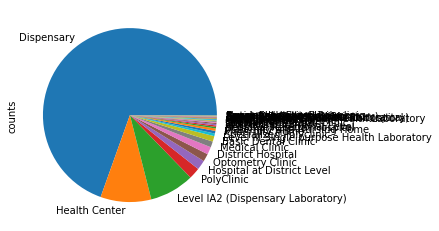

In [153]:
types_df.plot.pie(y='counts', labels=types_df['type'].values, legend=False)

In [154]:
types_df

,type,counts
0,Dispensary,7099
1,Health Center,962
2,Level IA2 (Dispensary Laboratory),848
3,PolyClinic,214
4,Hospital at District Level,181
5,Optometry Clinic,147
6,District Hospital,144
7,Medical Clinic,111
8,Basic Dental Clinic,105
9,Level III Single purpose Health Laboratory,50


In [270]:
types_df.to_csv('facility_types.csv')

# Clean lat/lng coordinates

In [7]:
def clean_lat_lng(row, key):
    coord = row[key]
    
    # skip NaN
    if coord != coord:
        return None
    
    coord_str = str(coord).replace(' ', '')
    
    if False and coord_str[1] in ['.']:
        if coord_str[0] == 'S':
            return abs(float(coord_str[2:])) * -1
        elif coord_str[0] == 'E':
            return float(coord_str[2:])

    if False and coord_str[0] in ['S', 'E']:
        return float(coord_str[1:])
    
    try:
        c = float(coord)
        
        if (key == 'Latitude'):
            if (c > 90 or c < -90):
                logging.warning(f"Latitude out of range ({coord}) for id={row['ID']}")
                return None
        elif (key == 'Longitude'):
            if (c > 180 or c < -180):
                logging.warning(f"Longitude out of range ({coord}) for id={row['ID']}")
                return None
        
        return c
        
    except Exception as error:
        logging.warning(f"Malformed {key} ({coord}) for id={row['ID']}")
        return None

def clean_lat(row):
    return clean_lat_lng(row, 'Latitude')
    
def cleat_lng(row):
    return clean_lat_lng(row, 'Longitude')


In [8]:
df['Latitude'] = df.apply(clean_lat, axis=1)
df['Longitude'] = df.apply(cleat_lng, axis=1)

In [9]:
def check_for_coord_pair(row):
    """ Make sure lat/lng are both set. """
    no_lat = False
    no_lng = False
    missing= ""
    if row['Latitude'] != row['Latitude']:
        missing += 'Latitude '
        no_lat = True
    
    if row['Longitude'] != row['Longitude']:
        missing += 'Longitude '
        no_lng = True
        
    if no_lat ^ no_lng:
        logging.warning(f"Missing one coordinate: {missing}for id={row['ID']}")
        row['Latitude'] = None
        row['Longitude'] = None
    
    return row

df = df.apply(check_for_coord_pair, axis=1)

In [10]:
print(f"Entries without coordinates {df['Latitude'].isna().sum()} ({df['Latitude'].isna().sum() / len(df):.2%}).")

Entries without coordinates 1343 (13.16%).


# Clean opened Date

In [11]:
stats = {
    'no_date': 0,
    'unix_0': 0,
    'malformed': 0,
    'future': 0,
    'valid': 0
}

def parse_date(row):
    date = row['Date Opened']
    
    # Skip NaN
    if date != date:
        stats['no_date'] += 1
        return pd.NaT
    
    # Skip timestamp=0
    if date == '1970-01-01':
        # is quite a lot...
        #logging.warning(f"Date is set to Unixtimstamp=0 for id={row['ID']}")
        stats['unix_0'] += 1
        return pd.NaT
    
    try:
        dtime = pd.to_datetime(date, format='%Y-%m-%d')
        
        if dtime > dt.datetime.now():
            stats['future'] += 1
            logging.warning(f"Date is in the future ({date}) for with state {row['Operating Status']} id={row['ID']}")
        else:
            stats['valid'] += 1
    
        return dtime
    except ValueError as e:
        logging.warning(f"Malformed date string ({date}) for id={row['ID']}")
        stats['malformed'] += 1
        return pd.NaT

df['Date Opened'] = df.apply(parse_date, axis=1)

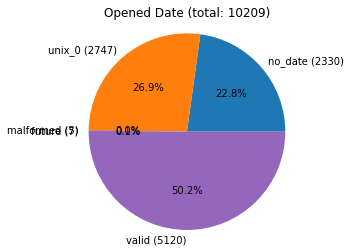

In [12]:
fig1, ax1 = plt.subplots()
ax1.pie(stats.values(), labels=[f"{k} ({v})" for k,v in stats.items()], autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(f'Opened Date (total: {len(df)})')
plt.show()

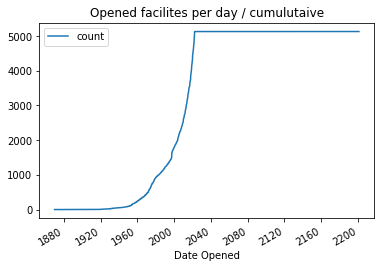

In [13]:
df.groupby('Date Opened').size().cumsum().reset_index(name='count').set_index('Date Opened').plot()
plt.title('Opened facilites per day / cumulutaive')
plt.show()

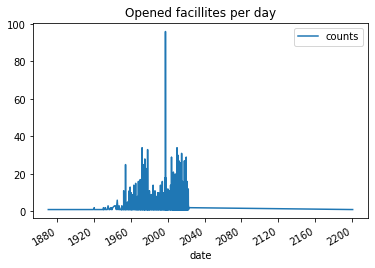

In [14]:
df['Date Opened'].value_counts(dropna=True).rename_axis('date').reset_index(name='counts').set_index('date').plot()
plt.title('Opened facillites per day')
plt.show()

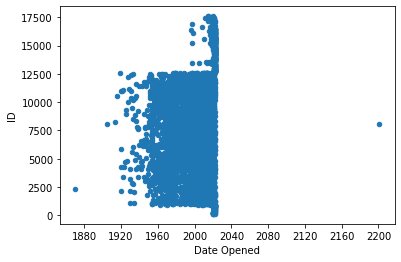

In [15]:
df.plot.scatter(y='ID', x='Date Opened')
plt.show()

In [16]:
# use for check open date agains 
# - Facility Type
# - Operating Status
# - Ownership
# - Region
# - District
# ->  no interesting insights...

#for r in list(df['Facility Type'].unique()):
#    dfx = df[df['Facility Type'] == r]
#    
#    dfx.plot.scatter(y='ID', x='Date Opened')
#    plt.title(r)

# Identify Region ID

In [17]:
regions_gdf = geopandas.read_postgis(f"SELECT * FROM region",
                     geom_col='geometry', con=get_engine())

In [18]:
regions = pd.Series(regions_gdf.region_id.values,index=regions_gdf.name).to_dict()

In [19]:
def get_region_id(name):
    """ Map provided region name to our database to determine region id for referencing. """
    name = name.replace(' Region', '')
    
    if name == 'Dar es Salaam':
        name = 'Dar-es-salaam'
    
    if name in regions:
        return regions[name]
    
    return None

In [20]:
df['region_id_by_name'] = df['Region'].apply(get_region_id)

In [21]:
# Amount of missing region IDs
len(df[df['region_id_by_name'].isna()])

0

In [22]:
region_shapes = dict(zip(regions_gdf.region_id, regions_gdf.geometry))

In [23]:
gdf = geopandas.GeoDataFrame(
        df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude, crs="EPSG:4326"))

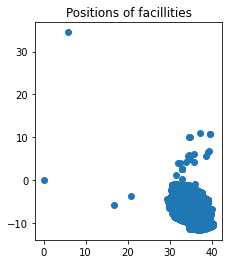

In [24]:
gdf.plot()
plt.title("Positions of facillities")
plt.show()

In [25]:
gdf['Longitude'].max()

40.424474

In [26]:
count = 0
error = 0
wrong_per_region = {}

def check_if_coord_is_inside_region(row):
    global count, error
    lat = row['Latitude']
    lng = row['Longitude']
    region_id = row['region_id_by_name']
    
    if pd.isnull(lat):
        return None

    p = Point(lng, lat)
    
    try:
        if not region_shapes[region_id].contains(p):
            logging.warning(f"Coordinate is not inside given region ({row['Region'] }) for id={row['ID']}")
            count += 1
            
            if region_id in wrong_per_region:
                wrong_per_region[region_id].append(row['ID'])
            else:
                wrong_per_region[region_id] = [row['ID']]
            
    except Exception as e:
        error += 1

df.apply(check_if_coord_is_inside_region, axis=1)

0        None
1        None
2        None
3        None
4        None
         ... 
10204    None
10205    None
10206    None
10207    None
10208    None
Length: 10209, dtype: object

In [27]:
print(count)

121


In [28]:
print(error)

101


In [29]:
wrong_per_region

{18: [1489, 4658, 4225, 620, 5497],
 7: [15117,
  2376,
  2807,
  9458,
  3131,
  3479,
  15068,
  4929,
  4033,
  7891,
  8817,
  11209,
  11449,
  904,
  11517,
  11923,
  11944,
  15426,
  10926,
  11464],
 11: [1729],
 1: [2143, 13370, 7274],
 23: [12194],
 19: [14762, 418, 13155, 8496, 6444, 5906, 9969, 10663, 467, 16273],
 16: [12781, 3489, 4241, 5020, 6953, 12523, 1738],
 25: [16079, 13001, 126, 4139, 8333, 16078, 16151, 13557, 10201, 10567, 10641],
 24: [2787, 9508, 11363],
 14: [12958, 9511],
 17: [16032, 4944, 15992, 7370, 9555, 10620],
 10: [13770, 12214],
 21: [3012, 3169, 6343, 14394, 10896],
 9: [16493, 15225],
 12: [4811],
 5: [3825, 7615, 11252, 11619],
 6: [4032, 5462, 6178, 6766, 7496, 8111, 7323, 12012],
 13: [16192, 15519, 7842, 16191, 9698, 10323, 14678, 11639],
 15: [5824, 5910, 8249],
 22: [6265, 14245, 14334],
 4: [8674, 8816, 6078],
 3: [8517, 8065, 9428, 9669, 9673, 1381],
 20: [8668],
 8: [5838],
 2: [8052, 10854],
 26: [6958, 8959, 17375]}

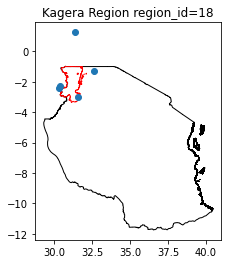

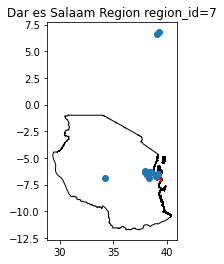

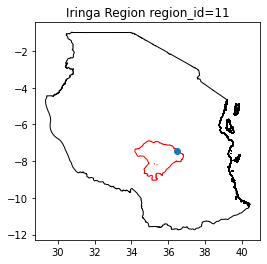

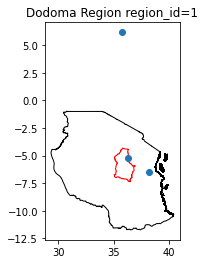

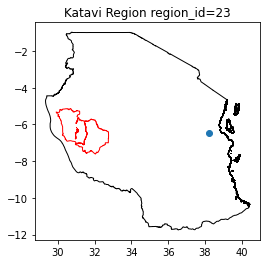

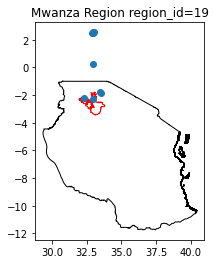

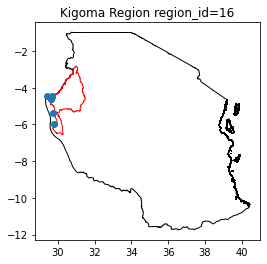

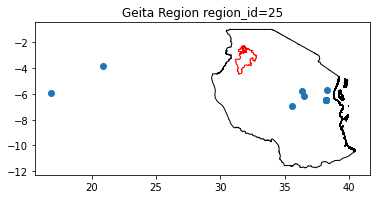

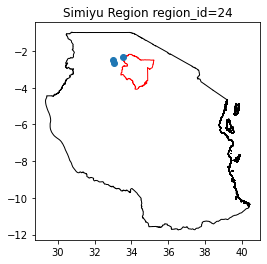

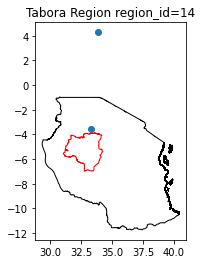

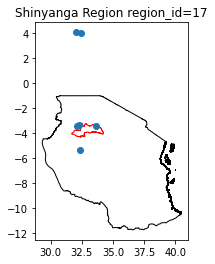

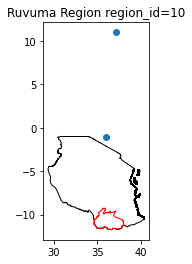

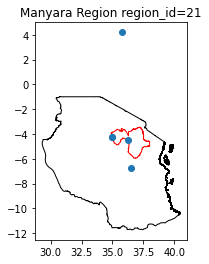

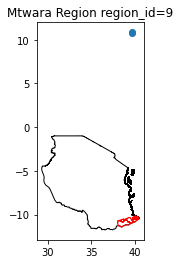

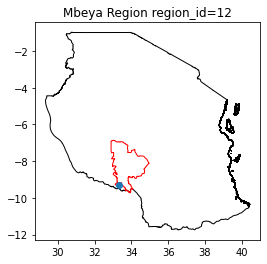

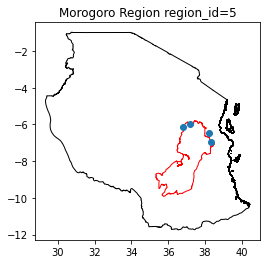

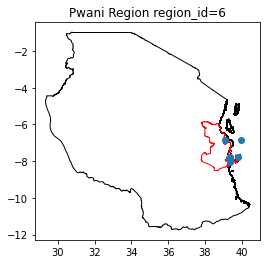

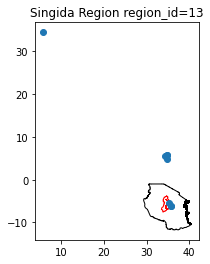

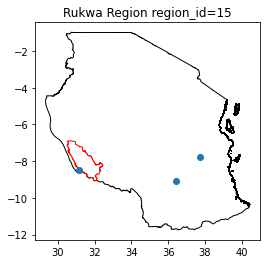

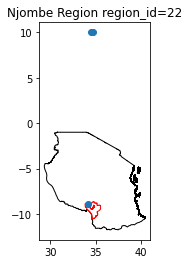

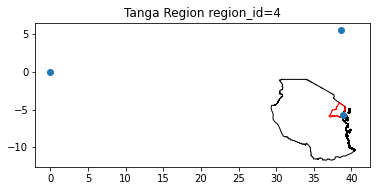

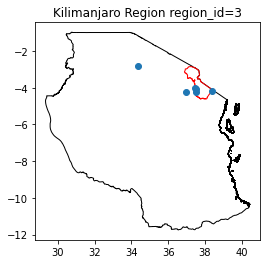

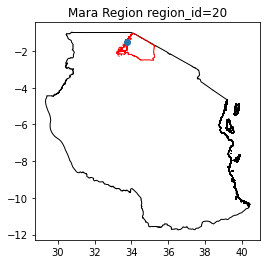

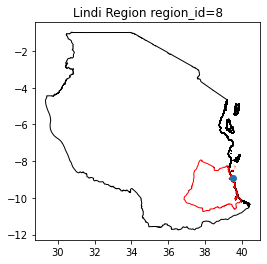

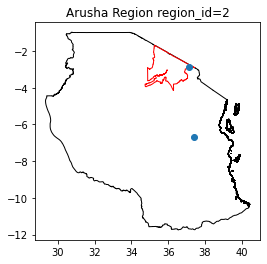

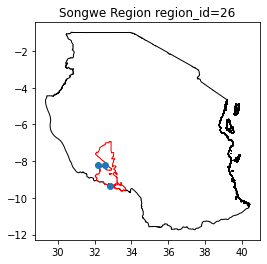

In [30]:
i = 1
taz_gdf = geopandas.read_file('TZA_adm0_tanzanianzima.geojson')

for region_id, wrongs in wrong_per_region.items():
    gdfx = regions_gdf[regions_gdf['region_id'] == region_id]
    
    dfx = df[df['ID'].isin(wrongs)].reset_index()
    gdfxp = geopandas.GeoDataFrame(
        dfx, geometry=geopandas.points_from_xy(dfx.Longitude, dfx.Latitude))
    
    ax = taz_gdf.plot(edgecolor='black', color='none')

    gdfx.plot(ax=ax, edgecolor='red', color='none')
    gdfxp.plot(ax=ax)
    plt.title(f"{dfx.at[0, 'Region']} region_id={region_id}")
    i+=1 
    
    plt.show()

In [31]:
def plot_wrong_region(row_id):
    dfx = df[df['ID'] == row_id].reset_index()
    
    region_id = dfx.at[0, 'region_id_by_name']
    
    gdfx = regions_gdf[regions_gdf['region_id'] == region_id]
    
    gdfxp = geopandas.GeoDataFrame(
        dfx, geometry=geopandas.points_from_xy(dfx.Longitude, dfx.Latitude))
    
    ax = gdfx.plot(edgecolor='black', color='none')
    gdfxp.plot(ax=ax)
    
    plt.show()

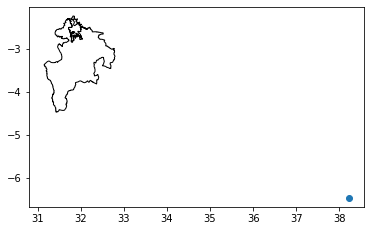

In [32]:
plot_wrong_region(4139)

In [33]:
gdf['Region'].value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')

,unique_values,counts
0,Dar es Salaam Region,1190
1,Mwanza Region,603
2,Morogoro Region,583
3,Dodoma Region,519
4,Arusha Region,493
5,Tanga Region,480
6,Kilimanjaro Region,459
7,Pwani Region,458
8,Mbeya Region,428
9,Tabora Region,398


In [34]:
len(gdf)

10209

# District Mapping

In [35]:
districts_gdf = geopandas.read_postgis("SELECT * FROM district",
                     geom_col='geometry', con=get_engine())

In [36]:
districts = pd.Series(districts_gdf.id.values, index=districts_gdf.name).to_dict()

In [37]:
engine = get_engine()

def get_district_id_by_coord(row):
    point = row['geometry']
    
    row['region_id_by_coord'] = None
    row['district_id_by_coord'] = None
    
    # isna() etc WON'T catch an empty geoemetry from geopands!
    if point.is_empty:
        return row
    
    match_district = districts_gdf[districts_gdf['geometry'].contains(point)].reset_index()
    
    if len(match_district) != 1:
        logging.warning(f"Could not match coordinate to district for id={row['ID']}")
        return row
    
    row['region_id_by_coord'] = match_district.at[0, 'region_id']
    row['district_id_by_coord'] = match_district.at[0, 'id']

    return row

In [38]:
gdf2 = gdf.apply(get_district_id_by_coord, axis=1)

In [39]:
gdf['region_id_by_coord'] = gdf2['region_id_by_coord']
gdf['district_id_by_coord'] = gdf2['district_id_by_coord']

In [40]:
na = {}
def get_district_id(name, council=None):
    name = name.replace(' District', '')

    # check how many matches
    c = 0
    t = None
    for d in list(districts.keys()):
        if d.startswith(name):
            c += 1
            t = d
    
    # only one match -> district identified
    if (c == 1):
        name = t
        return districts[name]
    else:
        # more matches, try to differntiate between TC and DC
        name_tc = f"{name} TC"
        if council.endswith(' TC') and name_tc in districts:
            return districts[name_tc]
            
        name_dc = f"{name} DC"
        if council.endswith(' DC') and name_dc in districts:
            return districts[name_dc]
        
        # individual mappings
        if name == 'Kigoma' and council == 'Kigoma Ujiji MC':
            return districts['Kigoma Municipal-Ujiji']
        
        if name in na:
            na[name] += 1
        else:
            na[name] = 1
        return None
    
    return None

In [41]:
na = {}
gdf['district_id_by_name'] = gdf.apply(lambda x: get_district_id(x.District, x.Council), axis=1)

In [42]:
gdf

,ID,Facility Number,Facility Name,Latitude,Longitude,Common Name,Region,District,Council,Ward,...,CTC_ID,msd_id,PostalAddress,OfficialEmail,Website,region_id_by_name,geometry,region_id_by_coord,district_id_by_coord,district_id_by_name
0,1417,113310-7,2001 GEM PLUS,-2.563525,32.912659,NaN,Mwanza Region,Nyamagana District,Nyamagana MC,Butimba,...,NaN,NaN,P. O. Box 13 81,marcoenos@gmail.com,NaN,19,POINT (32.91266 -2.56352),19.0,110.0,110.0
1,1419,108548-9,23KJ,NaN,NaN,Jeshini / JWTZ,Kagera Region,Biharamulo District,Biharamulo DC,Biharamulo Mjini,...,NaN,NaN,BOX 54 BIHARAMULO,NaN,NaN,18,POINT EMPTY,NaN,NaN,28.0
2,1420,110967-7,24KJ,NaN,NaN,24kj,Kigoma Region,Kigoma District,Kigoma Ujiji MC,Mwanga Kusini,...,NaN,NaN,box 85,NaN,NaN,16,POINT EMPTY,NaN,NaN,48.0
3,1422,111824-9,361 KJ,NaN,NaN,361 KJ,Dar es Salaam Region,Kinondoni District,Kinondoni MC,Makongo,...,NaN,NaN,NaN,NaN,NaN,7,POINT EMPTY,NaN,NaN,9.0
4,13559,120423-9,4POLYCLINIC,NaN,NaN,4polyclinic,Dar es Salaam Region,Ilala District,Ilala MC,Ukonga,...,NaN,NaN,box 17132,Ipyana.mwakamela@gmail.com,NaN,7,POINT EMPTY,NaN,NaN,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10204,1815,108429-2,ZUGIMLOLE,-5.325170,31.652449,Zugimlole,Tabora Region,Kaliua District,Kaliua DC,Zugimlole,...,NaN,NaN,Zugimlole,NaN,NaN,14,POINT (31.65245 -5.32517),14.0,153.0,153.0
10205,1817,114182-9,ZULU,NaN,NaN,ZULU,Dar es Salaam Region,Temeke District,Temeke MC,Mbagala Kuu,...,NaN,NaN,PO BOX 14629 DAR ES SALAAM,ilona.elisante@gmail.com,NaN,7,POINT EMPTY,NaN,NaN,10.0
10206,1818,111940-3,ZULU,-6.803010,39.126290,Zulu,Dar es Salaam Region,Ubungo District,Ubungo MC,Msigani,...,NaN,NaN,14629 DAR,Ilona.elisante@gmail.com,NaN,7,POINT (39.12629 -6.80301),7.0,193.0,193.0
10207,1820,108430-0,ZUNZULI,-3.324210,32.839330,Zunzuli dispensary,Shinyanga Region,Shinyanga District,Shinyanga DC,Mwenge,...,NaN,NaN,NaN,NaN,NaN,17,POINT (32.83933 -3.32421),17.0,139.0,139.0


In [43]:
na

{'Njombe': 108,
 'Moshi': 71,
 'Mpanda': 30,
 'Morogoro': 119,
 'Mtwara': 67,
 'Mbeya': 104,
 'Songea': 64,
 'Arusha': 163,
 'Bukoba': 44,
 'Iringa': 51,
 'Musoma': 41,
 'Babati': 28,
 'Arumeru': 66,
 'Shinyanga': 52,
 'Lindi': 45,
 "Nyang'hwale": 30,
 'Singida': 35,
 'Sumbawanga': 42}

In [44]:
taz_gdf = geopandas.read_file('TZA_adm0_tanzanianzima.geojson')

In [45]:
def viz_mismatch(df, key):
    subset_df = df[df['District'] == f'{key} District']
    
    subset_gdf = geopandas.GeoDataFrame(
        subset_df, geometry=geopandas.points_from_xy(subset_df.Longitude, subset_df.Latitude))
    
    districts_gdf = geopandas.read_postgis(f"SELECT * FROM district WHERE name LIKE %s", params=(f"%{key}%",),
                     geom_col='geometry', con=get_engine())
    
    
    fig, ax = plt.subplots(figsize=(12, 4))
    
    #taz_gdf.plot(facecolor="None", edgecolor='black', ax=ax)

    districts_gdf.plot(ax=ax, alpha=0.5, cmap="Pastel1", column='name', edgecolor='black')
    
    subset_gdf.plot(column='Council', ax=ax, marker='x', legend=True)
    
    plt.title(key)
    plt.show()


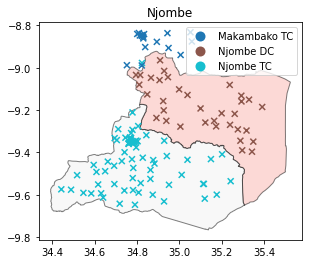

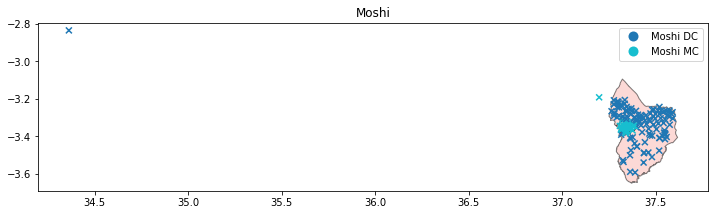

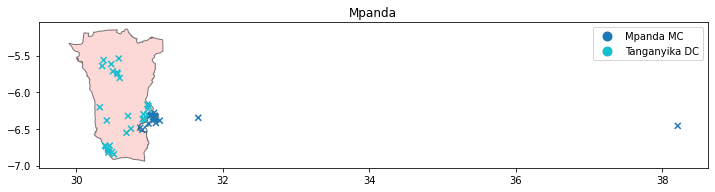

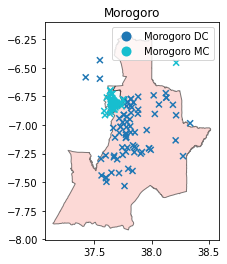

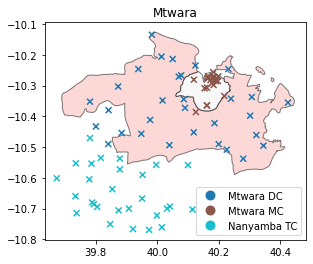

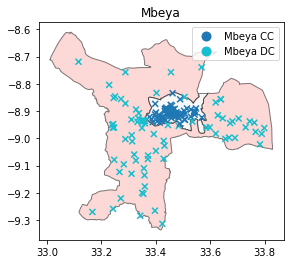

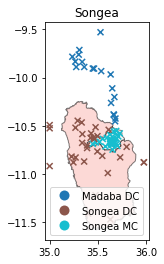

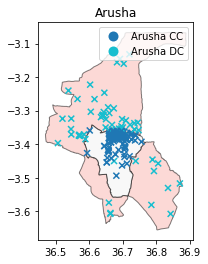

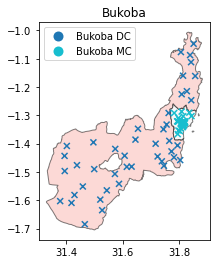

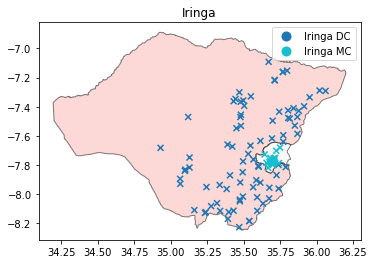

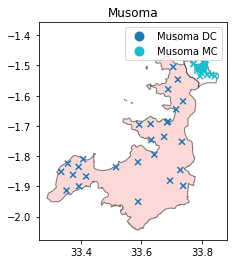

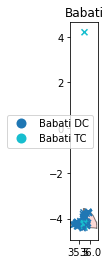

/opt/homebrew/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


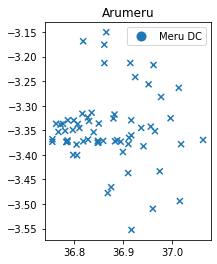

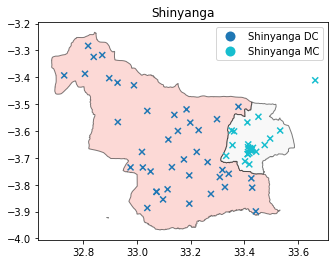

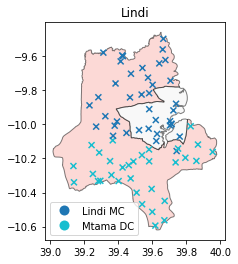

/opt/homebrew/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


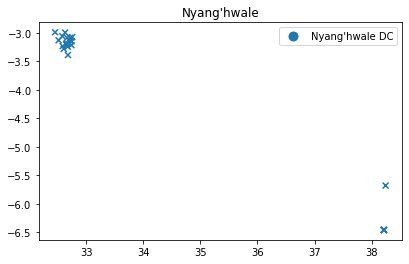

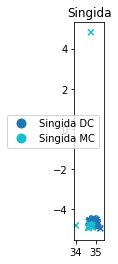

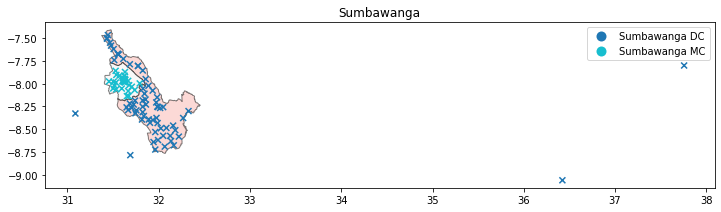

In [46]:
for key, count in na.items():
    viz_mismatch(df, key)

# Analyze mismatch between coord / name based distrcit/region mapping

In [47]:
without_district = gdf[gdf['district_id_by_coord'].isnull() & gdf['district_id_by_name'].isnull()]

In [48]:
print(len(without_district))

225


In [49]:
total = len(gdf)

region_id_by_name = gdf['region_id_by_name'].isnull().sum()
region_id_by_coord = gdf['region_id_by_coord'].isnull().sum()

district_id_by_name = gdf['district_id_by_name'].isnull().sum()
district_id_by_coord = gdf['district_id_by_coord'].isnull().sum()

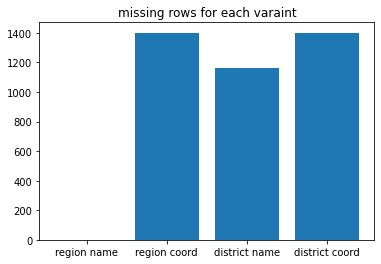

In [50]:
plt.bar(['region name', 'region coord', 'district name', 'district coord'], 
        height=[region_id_by_name, region_id_by_coord, district_id_by_name, district_id_by_coord])
plt.title("missing rows for each varaint")
plt.show()

In [51]:
# name and coord based mismatch for region
not_na_regions = gdf[gdf['region_id_by_name'].notna() & gdf['region_id_by_coord'].notna()]
not_na_regions_missmatch = not_na_regions[not_na_regions['region_id_by_name'] != not_na_regions['region_id_by_coord']]
len(not_na_regions_missmatch)

63

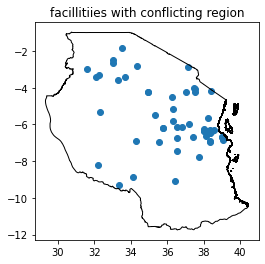

In [52]:
ax = not_na_regions_missmatch.plot()
taz_gdf.plot(facecolor="None", edgecolor='black', ax=ax)
plt.title("facillitiies with conflicting region")
plt.show()

In [53]:
# name and coord based mismatch for district
not_na_district = gdf[gdf['district_id_by_name'].notna() & gdf['district_id_by_coord'].notna()]
not_na_district_missmatch = not_na_district[not_na_district['district_id_by_name'] != not_na_district['district_id_by_coord']]
len(not_na_district_missmatch) 

519

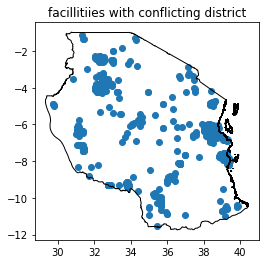

In [54]:
ax = not_na_district_missmatch.plot()
taz_gdf.plot(facecolor="None", edgecolor='black', ax=ax)
plt.title("facillitiies with conflicting district")
plt.show()

In [55]:
# has a valid geoemtry (POINT) but no district/region by coord -> point is OUTSIDE of Tanzania
outside_tanzania = gdf[~gdf['geometry'].is_empty & gdf['district_id_by_coord'].isna()]

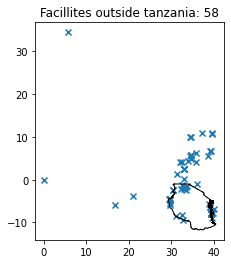

In [56]:
ax = outside_tanzania.plot(marker="x")
taz_gdf.plot(facecolor="None", edgecolor='black', ax=ax)
plt.title(f"Facillites outside tanzania: {len(outside_tanzania)}")
plt.show()

# Get final result set and write to database

In [69]:
def determine_region_id(row):
    
    # prefere region name over coordinate
    #if pd.notna(row['region_id_by_name']):
    #    return row['region_id_by_name']
    
    if pd.notna(row['region_id_by_coord']):
        return row['region_id_by_coord']
    
    return None
    
def determine_dsistrict_id(row):
    
    # prefere region name over coordinate
    #if pd.notna(row['district_id_by_name']):
    #    return row['district_id_by_name']
    
    if pd.notna(row['district_id_by_coord']):
        return row['district_id_by_coord']
    
    return None
    

In [58]:
gdf

,ID,Facility Number,Facility Name,Latitude,Longitude,Common Name,Region,District,Council,Ward,...,CTC_ID,msd_id,PostalAddress,OfficialEmail,Website,region_id_by_name,geometry,region_id_by_coord,district_id_by_coord,district_id_by_name
0,1417,113310-7,2001 GEM PLUS,-2.563525,32.912659,NaN,Mwanza Region,Nyamagana District,Nyamagana MC,Butimba,...,NaN,NaN,P. O. Box 13 81,marcoenos@gmail.com,NaN,19,POINT (32.91266 -2.56352),19.0,110.0,110.0
1,1419,108548-9,23KJ,NaN,NaN,Jeshini / JWTZ,Kagera Region,Biharamulo District,Biharamulo DC,Biharamulo Mjini,...,NaN,NaN,BOX 54 BIHARAMULO,NaN,NaN,18,POINT EMPTY,NaN,NaN,28.0
2,1420,110967-7,24KJ,NaN,NaN,24kj,Kigoma Region,Kigoma District,Kigoma Ujiji MC,Mwanga Kusini,...,NaN,NaN,box 85,NaN,NaN,16,POINT EMPTY,NaN,NaN,48.0
3,1422,111824-9,361 KJ,NaN,NaN,361 KJ,Dar es Salaam Region,Kinondoni District,Kinondoni MC,Makongo,...,NaN,NaN,NaN,NaN,NaN,7,POINT EMPTY,NaN,NaN,9.0
4,13559,120423-9,4POLYCLINIC,NaN,NaN,4polyclinic,Dar es Salaam Region,Ilala District,Ilala MC,Ukonga,...,NaN,NaN,box 17132,Ipyana.mwakamela@gmail.com,NaN,7,POINT EMPTY,NaN,NaN,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10204,1815,108429-2,ZUGIMLOLE,-5.325170,31.652449,Zugimlole,Tabora Region,Kaliua District,Kaliua DC,Zugimlole,...,NaN,NaN,Zugimlole,NaN,NaN,14,POINT (31.65245 -5.32517),14.0,153.0,153.0
10205,1817,114182-9,ZULU,NaN,NaN,ZULU,Dar es Salaam Region,Temeke District,Temeke MC,Mbagala Kuu,...,NaN,NaN,PO BOX 14629 DAR ES SALAAM,ilona.elisante@gmail.com,NaN,7,POINT EMPTY,NaN,NaN,10.0
10206,1818,111940-3,ZULU,-6.803010,39.126290,Zulu,Dar es Salaam Region,Ubungo District,Ubungo MC,Msigani,...,NaN,NaN,14629 DAR,Ilona.elisante@gmail.com,NaN,7,POINT (39.12629 -6.80301),7.0,193.0,193.0
10207,1820,108430-0,ZUNZULI,-3.324210,32.839330,Zunzuli dispensary,Shinyanga Region,Shinyanga District,Shinyanga DC,Mwenge,...,NaN,NaN,NaN,NaN,NaN,17,POINT (32.83933 -3.32421),17.0,139.0,139.0


In [70]:
gdf['region_id'] = gdf.apply(determine_region_id, axis=1)
gdf['district_id'] = gdf.apply(determine_dsistrict_id, axis=1)

In [71]:
remove = gdf[gdf['region_id'].isna() | gdf['district_id'].isna()]
final = gdf[gdf['region_id'].notna() & gdf['district_id'].notna()]

<AxesSubplot:>

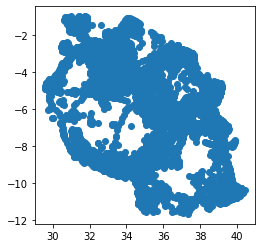

In [72]:
final.plot()

In [74]:
final['region_id'].value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')

,unique_values,counts
0,7.0,860
1,19.0,510
2,5.0,489
3,1.0,436
4,2.0,433
5,3.0,419
6,6.0,409
7,4.0,408
8,12.0,395
9,14.0,352


In [75]:
final['district_id'].value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')

,unique_values,counts
0,8.0,258
1,9.0,212
2,10.0,181
3,193.0,162
4,2.0,130
...,...,...
179,188.0,12
180,181.0,11
181,40.0,11
182,89.0,10


In [105]:
def count_region(df):
    re = []
    
    for k, v in regions_gdf.iterrows():
        dfx = df[df['region_id'] == v['region_id']]
        re.append({
            'id': v['region_id'],
            'name': v['name'],
            'count': len(dfx),
            'geometry': v['geometry']
        })
    
    return re

In [107]:
d = count_region(final)

<AxesSubplot:>

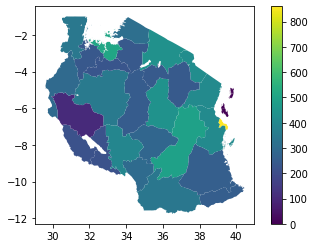

In [108]:
count_region = geopandas.GeoDataFrame(d)
count_region.plot(column='count', legend=True)

In [120]:
# count per distrcit

def count_district(df, year=None):
    re = []
    
    for k, v in districts_gdf.iterrows():
        dfx = df[df['district_id'] == v['id']]
        re.append({
            'id': v['id'],
            'name': v['name'],
            'count': len(dfx),
            'geometry': v['geometry'],
            'year': year
        })
    
    return re
    

In [90]:
count_all = geopandas.GeoDataFrame(count_district(final))

<AxesSubplot:>

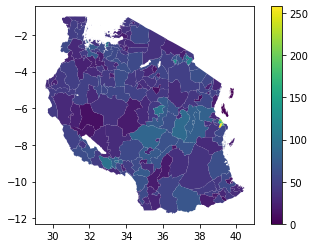

In [94]:
count_all.plot(column='count', legend=True)

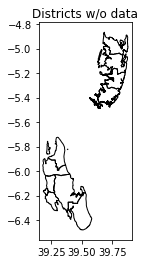

In [100]:
count_all[count_all['count'] == 0].plot(edgecolor='black', facecolor='none')
plt.title('Districts w/o data')
plt.show()

In [114]:
# group by year/distrcit
with_date = final[final['Date Opened'].notna()]
with_date['year'] = with_date['Date Opened'].apply(lambda x: x.year)

In [112]:
len(with_date)

4379

In [121]:
per_year = []
for y in list(with_date['year'].unique()):
    dfx = with_date[with_date['year'] == y]
    per_year += count_district(dfx, y)

In [126]:
per_year_df = geopandas.GeoDataFrame(per_year)

In [155]:
per_year_df

,id,name,count,geometry,year
0,1,Arusha DC,0,"MULTIPOLYGON (((36.79314 -3.39499, 36.79285 -3...",2001
1,2,Arusha MC,0,"POLYGON ((36.63328 -3.36609, 36.63297 -3.36625...",2001
2,3,Karatu DC,2,"POLYGON ((35.88714 -3.26276, 35.88595 -3.26604...",2001
3,4,Longido DC,0,"MULTIPOLYGON (((36.35809 -3.05992, 36.35823 -3...",2001
4,5,Meru DC,0,"POLYGON ((36.90033 -3.05354, 36.90150 -3.05390...",2001
...,...,...,...,...,...
20470,191,Songwe DC,0,"POLYGON ((32.89625 -6.93692, 32.89573 -6.96095...",1919
20471,192,Tarime TC,0,"POLYGON ((34.38746 -1.28793, 34.39209 -1.28903...",1919
20472,193,Ubungo MC,0,"POLYGON ((39.16298 -6.69287, 39.16315 -6.69296...",1919
20473,194,Butiama DC,0,"POLYGON ((34.29664 -1.46716, 34.29644 -1.46806...",1919


In [215]:
hfind_df = per_year_df[per_year_df['id'] == 1].reset_index()

In [216]:
hfind_df

,index,id,name,count,geometry,year
0,0,1,Arusha DC,0,"MULTIPOLYGON (((36.79314 -3.39499, 36.79285 -3...",2001
1,195,1,Arusha DC,0,"MULTIPOLYGON (((36.79314 -3.39499, 36.79285 -3...",2014
2,390,1,Arusha DC,0,"MULTIPOLYGON (((36.79314 -3.39499, 36.79285 -3...",2013
3,585,1,Arusha DC,1,"MULTIPOLYGON (((36.79314 -3.39499, 36.79285 -3...",2015
4,780,1,Arusha DC,0,"MULTIPOLYGON (((36.79314 -3.39499, 36.79285 -3...",2016
...,...,...,...,...,...,...
100,19500,1,Arusha DC,0,"MULTIPOLYGON (((36.79314 -3.39499, 36.79285 -3...",1937
101,19695,1,Arusha DC,0,"MULTIPOLYGON (((36.79314 -3.39499, 36.79285 -3...",2201
102,19890,1,Arusha DC,0,"MULTIPOLYGON (((36.79314 -3.39499, 36.79285 -3...",1931
103,20085,1,Arusha DC,0,"MULTIPOLYGON (((36.79314 -3.39499, 36.79285 -3...",1915


In [267]:
def viz_healtfacilities_per_distrct(df, district_id):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    hf_in_d_df = df[df['district_id'] == district_id].reset_index()
    district = hf_in_d_df.at[0, 'Region']
    

    # amount w/o date
    without_opening_date = len(hf_in_d_df[hf_in_d_df['Date Opened'].isnull()])


    # only with date
    with_date = hf_in_d_df[hf_in_d_df['Date Opened'].notna()]
    with_date['year'] = with_date['Date Opened'].apply(lambda x: x.year)

    #with_date.index = pd.to_datetime(with_date['year'], format='%Y')
    #with_date = with_date.sort_index()

    all_per_year = with_date.groupby('year').size().reset_index(name='count')
    all_per_year.index = pd.to_datetime(all_per_year['year'], format='%Y')

    display(all_per_year)

    all_per_year['count'].plot.bar(ax=ax1)
    ax1.set_title('Openings per year')


    all_per_year['count_cum'] = all_per_year['count'].cumsum()
    all_per_year['count_cum'] += without_opening_date

    all_per_year['count_cum'].plot(ax=ax2)
    ax2.set_title('Cumulative openings per year with unkown date as base')

    
    fig.suptitle(f'Healt facilities in {district}')
    plt.show()
    
    

,year,count
year,,
1999-01-01,1999,1
2000-01-01,2000,1
2017-01-01,2017,1
2020-01-01,2020,1
2021-01-01,2021,2


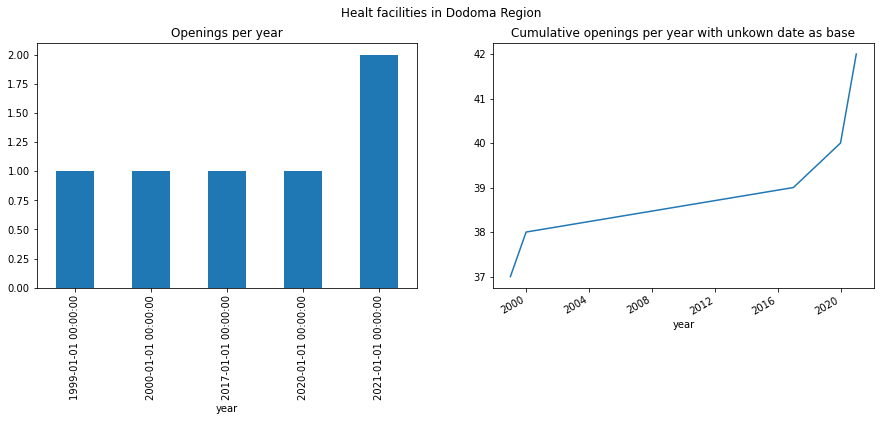

In [269]:
viz_healtfacilities_per_distrct(final, 15)

# Write to database

In [65]:
final.to_postgis('healthfacilities', con=get_engine())